# Q-Learning to Taxi OpenAI gym

## Setup

In [0]:
import numpy as np
import random
from matplotlib import pyplot as plt

# reinforcement learning examples in it
import gym

# visualize training
from IPython.display import clear_output

# use sleep to get a snapshot and to visualize training process
from time import sleep

# to download files from Colab
from google.colab import files

## Environment

In [2]:
# taxi example of reinforcement learning
env = gym.make("Taxi-v3").env

# fix the initial location of a taxi
env.s = env.encode(3, 4, 2, 0)
# vertical and horizontal states start from 0, so 0, 1, 2, 3, 4 for each

# show the taxi and a park
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Box is a taxi. The initial location of a taxi randomly will be assigned. Yellow means the taxi is empty. Once a passanger takes it, the box becomes black. Alphabets are possible locations for pickup or destination. The blue shows a passener is there, and the pink is the place he wants to go. After Q-learning, we will see what the best action is in this location. Since a passenger is at Y, a taxi should go north or west first step.

## Check spec

In [3]:
# show the number of action states
print(env.action_space)

# show the number of observation state, which is 5 * 5 * 4 * (1 + 4) 
# (Vetical * horizontal * pickup location * passenger-in-the-taxi state and destination)
print(env.observation_space)

# internal logic
print(env.s)
print(env.P[env.s])

Discrete(6)
Discrete(500)
388
{0: [(1.0, 488, -1, False)], 1: [(1.0, 288, -1, False)], 2: [(1.0, 388, -1, False)], 3: [(1.0, 368, -1, False)], 4: [(1.0, 388, -10, False)], 5: [(1.0, 388, -10, False)]}


env.P is {action: [(probability, next state, reward, done)]}

## Initialize Q-table

In [4]:
## q table
# possibilities for all the state spaces and action spaces
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table.shape)

(500, 6)


## Q learning

In [5]:
## q learning

# show training time
%%time

# hyperparameters for q learning
alpha = 0.1
gamma = 0.6
epsilon = 0.1
# use grid search to know these values if you want to

for i in range(1, 100001):
  
  # initialize by reset
  state = env.reset()
  epochs = 0
  penalties = 0
  reward = 0
  done = False
  
  # done is successful passenger dropoff
  while not done:
    
    # using epsilon logic deliberately avoid taking best route many time
    # it can reduce overfitting.
    if random.uniform(0, 1) < epsilon:
      # explore action space
      action = env.action_space.sample()
      # deliberately sample action states from 0,1,2,3,4,5 to explore new possibilities
      
    else:
      # exploit learned values
      action = np.argmax(q_table[state])
      # draw best action
      
    # draw following info from the action we decided
    next_state, reward, done, info = env.step(action)
    
    # draw q value in a certain state and with a certain action
    old_value = q_table[state, action]
    
    # we already took action, so we have next state
    # np.max draw the maximum q value from each action in a certain state
    next_max = np.max(q_table[next_state])
    
    # The most important q value update algorithm for Q-learning
    new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    # It's a combination of reward of current action in current state 
    # and discounted maximum reward from next state from current action
    
    # update Q-table of a certain state of a certain action
    q_table[state, action] = new_value 
    
    # if making a big mistake, accumulate penalty
    if reward == -10:
      penalties += 1
     
    # for iteration
    state = next_state
    epochs += 1
    
  if i % 100 == 0:
    clear_output(wait = True)
    print(f"Episode: {i}")
    
print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 40.1 s, sys: 4.21 s, total: 44.3 s
Wall time: 40.9 s


## Check result

In [6]:
print(q_table.shape)

(500, 6)


In [7]:
## head of estimated q-table

print(np.round(q_table[0:5, :], decimals = 3))

[[  0.      0.      0.      0.      0.      0.   ]
 [ -2.418  -2.364  -2.418  -2.364  -2.273 -11.364]
 [ -1.87   -1.45   -1.87   -1.45   -0.75  -10.45 ]
 [ -2.364  -2.273  -2.364  -2.273  -2.122 -11.273]
 [ -2.496  -2.497  -2.496  -2.497  -9.236 -10.049]]


In [0]:
## tail of estimated q-table

print(np.round(q_table[len(q_table)-5:len(q_table)+1, :], decimals = 3))

[[ 0.     0.     0.     0.     0.     0.   ]
 [-2.189 -2.122 -2.189 -2.122 -3.699 -6.307]
 [-0.956  0.416 -0.97  -1.105 -4.039 -3.432]
 [-2.158 -2.122 -2.146 -2.122 -5.726 -6.16 ]
 [ 3.305  1.328  3.084 11.    -1.983 -2.485]]


In [0]:
## optimal policy in each state

print(np.argmax(q_table, axis =1))

[0 4 4 4 0 0 2 0 0 0 0 0 0 2 2 0 5 0 0 0 0 3 3 3 0 0 0 0 0 0 0 3 0 0 0 0 3
 0 3 0 0 0 0 0 2 0 2 2 0 0 0 0 2 2 0 0 0 2 0 2 0 3 3 3 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 3 3 0 4 0 4 4 3 0 0 3 3 0 0 0 3 5 3 0 0 1 1 1 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 1 2
 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 3 1
 0 1 1 3 0 0 0 3 3 3 0 3 1 3 3 0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 1
 1 1 2 0 2 2 3 3 0 3 2 2 2 0 3 2 3 2 0 3 3 3 1 0 1 1 3 3 0 3 2 2 2 0 3 2 3
 2 0 3 3 3 1 0 1 1 3 3 0 3 0 0 0 0 3 1 3 0 0 3 3 3 1 0 1 1 3 3 0 3 0 0 0 0
 3 1 3 3 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 2 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 3 1 0 1 1 1 2 0 2 2 1 1
 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 3 3 0 0 0 3 1 1 3 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 2 0 2 1 1 1 0 1 1 2 1 0 1 0 1 2 0 1 3 1
 1 0 1 1 1 3 0 3 1 1 1 0 3 1 1 1 0 1 1 1 2 0 1 2 1 1 0 1 4 4 4 0 1 1 1 5 0
 3 3 1 1 0 1 1 3 1 0 1 3 

## Evaluation
We apply the learned Q table and derive the optimal action in each state.

In [0]:
## evaluation
EVALUATION_EPISODES = 100
time_step_list = []
reward_list = []

for _ in range(EVALUATION_EPISODES):
    # initialization
    state = env.reset()
    done = False
    reward = 0
    total_rewards = 0
    time_steps = 0

    # done will be True in successful dropoff and stop
    while not done:
        # action derived from the optimal policy
        action = np.argmax(q_table[state])
        # next state, collect reward
        state, reward, done, info = env.step(action)
        # accumulate time step
        time_steps += 1
        # accumulate total rewards
        total_rewards += reward

    # store result at the end of each episode
    time_step_list.append(time_steps)
    reward_list.append(total_rewards)

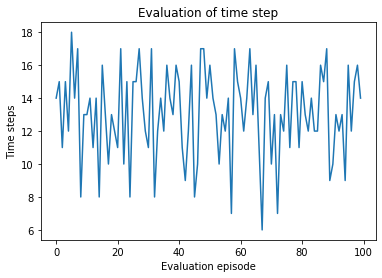

In [14]:
ep = range(len(time_step_list))
plt.plot(ep, time_step_list)
plt.xlabel("Evaluation episode")
plt.ylabel("Time steps")
plt.title("Evaluation of time step")
plt.savefig("evaluation_of_time_step.png")
plt.show()

In [0]:
files.download("evaluation_of_time_step.png")

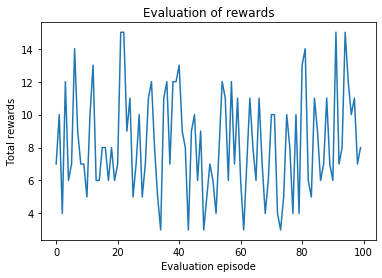

In [0]:
plt.plot(ep, reward_list)
plt.xlabel("Evaluation episode")
plt.ylabel("Total rewards")
plt.title("Evaluation of rewards")
plt.savefig("evaluation_of_rewards.png")
plt.show()

In [0]:
files.download("evaluation_of_rewards.png")

## Visualization of evaluation

In [15]:
## evaluation

state = env.reset()
print(state)
env.render()
rewards = []

82
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [16]:
print(state)

82


In [17]:
done = False

while done == False:

    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)
    rewards.append(reward)
    # print(reward)
    # print(done)
    env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y|

In [10]:
total_reward = sum(rewards)
print(total_reward)

3
